<a href="https://colab.research.google.com/github/alimoorreza/CS143-sp26-notes/blob/main/implementing_search_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Search Algorithms


This notebook uses a new class in our `mapbots` module called `FullyObservableStreetSweeperWorld` which is a subclass of the StreetSweeperWorld we worked with that reveals more details of the environment that the bot can use to make decisions.

You do need to install a new version of the module. You can do probably do that with something like this (which should upgrade if you ran it on your own computer - or it should always work in Colab).

In [ ]:
import sys

!{sys.executable} -m pip install mapbots

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.3 MB/s eta 0:00:00


## Getting Started

We create the bot/environment in the same way, except that the name of the class is `FullyObservableStreetSweeperWorld`

Setting up the map. This may take a few minutes.


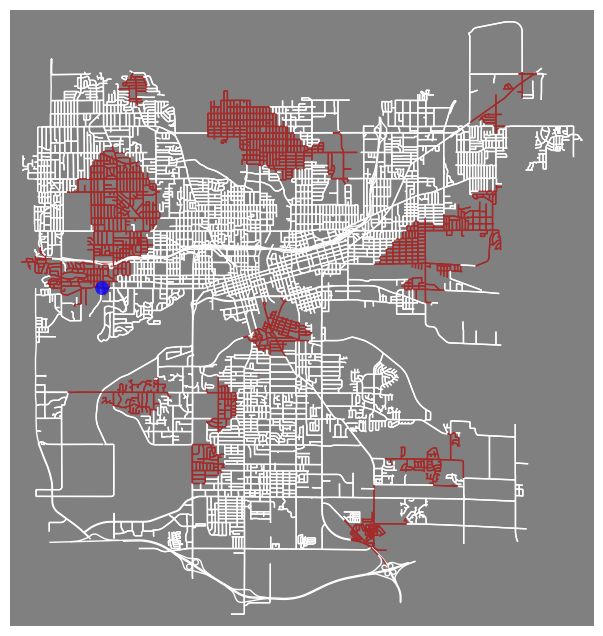

In [ ]:
from mapbots import FullyObservableStreetSweeperWorld

planning_bot = FullyObservableStreetSweeperWorld(place="Des Moines, Iowa, USA",map_number=11)
planning_bot.display_map()

## Finding the dirty regions

This version has a `get_dirty_regions()` method which will give a list of all those areas that are dirty. You can see that it returns a list which shows the `location_id` (i.e., the intersection) of the center of each dirty region and a `size` which tells you roughly how big of a dirty area that is.

In [ ]:
print("battery_life:", planning_bot.get_battery_life())

battery_life: 72000


In [ ]:
print("location_info:", planning_bot.get_location_info(160942958))

location_info: {'y': 41.55554, 'x': -93.672493, 'street_count': 3, 'location_id': 160942958}


In [ ]:
dirty_regions = planning_bot.get_dirty_regions()
display(dirty_regions)

[{'center': 160942958, 'size': 1755},
 {'center': 9678092897, 'size': 954},
 {'center': 160911825, 'size': 1041},
 {'center': 160955006, 'size': 389},
 {'center': 160834040, 'size': 1647},
 {'center': 160929435, 'size': 975},
 {'center': 160976112, 'size': 1258},
 {'center': 160840119, 'size': 193},
 {'center': 160910548, 'size': 622},
 {'center': 160820766, 'size': 186},
 {'center': 160936195, 'size': 1659},
 {'center': 1163836326, 'size': 1300},
 {'center': 160772452, 'size': 1220},
 {'center': 160895527, 'size': 1976},
 {'center': 160911954, 'size': 1340},
 {'center': 4789624236, 'size': 1261},
 {'center': 160995538, 'size': 323},
 {'center': 160971796, 'size': 31},
 {'center': 160934325, 'size': 130},
 {'center': 160790885, 'size': 74},
 {'center': 160842274, 'size': 1802},
 {'center': 160855919, 'size': 1229},
 {'center': 160759140, 'size': 1594},
 {'center': 160914943, 'size': 669},
 {'center': 160908607, 'size': 1211},
 {'center': 160844167, 'size': 1064}]

Because this is a list of dictionaries, if you wanted to isolate one of those center location_ids, you could do it with an index and then selecting the `'center'` key like this.

In [ ]:
destination = dirty_regions[0]
print(destination)

{'center': 160942958, 'size': 1755}


## Getting info about far away locations

Previously, we could only see the information about the current location and surrounding streets like this

In [ ]:
print(planning_bot.get_current_location())

{'y': 41.5845488, 'x': -93.6785831, 'street_count': 3, 'location_id': 160854122}


In [ ]:
planning_bot.scan_next_streets()

[{'start': {'y': 41.5845488,
   'x': -93.6785831,
   'street_count': 3,
   'location_id': 160854122},
  'end': {'y': 41.5863961,
   'x': -93.6779428,
   'street_count': 3,
   'location_id': 160903195},
  'street_data': {'osmid': 16008213,
   'highway': 'residential',
   'name': '44th Street',
   'oneway': False,
   'reversed': False,
   'length': np.float64(226.0045741404898),
   'geometry': <LINESTRING (-93.679 41.585, -93.679 41.585, -93.678 41.585, -93.678 41.585,...>,
   'speed_kph': 41.2393375,
   'travel_time': 19.72913524388609,
   'cleanliness': 'dirty'}},
 {'start': {'y': 41.5845488,
   'x': -93.6785831,
   'street_count': 3,
   'location_id': 160854122},
  'end': {'y': 41.58455,
   'x': -93.679205,
   'street_count': 3,
   'location_id': 160854125},
  'street_data': {'osmid': 46112587,
   'highway': 'secondary',
   'name': 'Grand Avenue',
   'oneway': False,
   'reversed': False,
   'length': np.float64(51.72613511916947),
   'geometry': <LINESTRING (-93.679 41.585, -93.679 4

But now you can get this information about any node - even one that is far away. Here's how you can do it about the `destination` note from above.

We call the `get_location_info` method and pass the location_id of the far away node as an argument.

In [ ]:
planning_bot.get_location_info( destination['center'] )

{'y': 41.55554, 'x': -93.672493, 'street_count': 3, 'location_id': 160942958}

We can also pass a location_id to `get_outgoing_streets_from_location` to see what streets you could access from that location if you were there. (note, there is also a `get_incoming_streets_from_location` method, but you may not need that)

In [ ]:
planning_bot.get_outgoing_streets_from_location( destination['center'] )

[{'start': {'y': 41.55554,
   'x': -93.672493,
   'street_count': 3,
   'location_id': 160942958},
  'end': {'y': 41.555539,
   'x': -93.672018,
   'street_count': 3,
   'location_id': 160991031},
  'street_data': {'osmid': 436497918,
   'highway': 'secondary',
   'name': 'Park Avenue',
   'oneway': False,
   'reversed': True,
   'length': np.float64(39.52430477071681),
   'speed_kph': 52.12231801801802,
   'travel_time': 2.729876616872518,
   'cleanliness': 'dirty'}},
 {'start': {'y': 41.55554,
   'x': -93.672493,
   'street_count': 3,
   'location_id': 160942958},
  'end': {'y': 41.551732,
   'x': -93.672684,
   'street_count': 3,
   'location_id': 160942913},
  'street_data': {'osmid': 16011835,
   'highway': 'residential',
   'name': 'Southern Woods Drive',
   'oneway': False,
   'reversed': True,
   'length': np.float64(464.6647136456206),
   'geometry': <LINESTRING (-93.672 41.556, -93.672 41.555, -93.672 41.555, -93.672 41.555,...>,
   'speed_kph': 41.2393375,
   'travel_time': 

## Demo: Coding up BFS

In class, we're going to walk through writing the code to implement breadth-first search for this problem.

To start with, we're including the book's description of the algorithm

In [ ]:
# function Tree-Search( problem, strategy) returns a solution, or failure initialize the frontier using the initial state of problem
#   initialize the frontier using the initial state of problem
#   loop do
#     if the frontier is empty then return failure
#     choose a leaf node from the frontier according to strategy
#     if the node contains a goal state then return the corresponding solution
#     else expand the node and add the resulting nodes to the frontier
#   end el

## Solution

In case you don't get it all down in class, here is a solution I worked up ahead of time.

In [ ]:
# We need a way to represent the nodes in the tree
# I'm trying to keep this one simple, but you could
# use better object-oriented programming practices
class SSWSearchNode:

    def __init__(self,location,parent=None):

        self.location = location #this is the state

        self.parent = parent #keeps track of the node that leads to this one
        self.children = [] #a list of all the nodes that appear below this when expanded

    # we'll add all the new nodes using this function when we "expand" this node
    def add_child(self,new_child_node):
        self.children.append(new_child_node)

In [ ]:
# Solution with deque() datastructure
# this uses a deque because it has fast access to both the left and right
# since we are implementing the frontier as a queue, it should be much faster

from collections import deque
import time


def bfs(bot,destination):
    # measure time to find efficiency of bfs()
    start_time = time.time()

    # initialize the frontier using the initial state of problem
    initial_location = bot.get_current_location()
    root_node = SSWSearchNode(initial_location["location_id"])
    frontier = deque()
    frontier.append(root_node) # INSERT(initial_state, frontier)


    while True:
        if frontier == []: # if the frontier is empty then return failure
            return None    # failure

        # choose a leaf node from the frontier according to strategy
        chosen_leaf = frontier.popleft() # REMOVE(frontier): take the thing off the front of the "queue"

        # if the node contains a goal state then return the corresponding solution
        if chosen_leaf.location == destination: #destination is the goal

            # calculate the total time spent during bfs() when the goal is reached
            print('successfully reached goal state in', (time.time() - start_time), 'seconds')

            # we're looping through the tree and creating a list from the locations in each node
            route = deque()
            curr_node = chosen_leaf
            while curr_node.parent != None:
                route.appendleft(curr_node.location)
                curr_node = curr_node.parent
            return route
        # else expand the node and add the resulting nodes to the frontier
        else:

            for street in bot.get_outgoing_streets_from_location( chosen_leaf.location ):
                new_node = SSWSearchNode(street["end"]["location_id"], parent=chosen_leaf)

                chosen_leaf.add_child(new_node)
                frontier.append(new_node)


    # calculate the total time spent during bfs() when the goal is reached
    print('Could not reach goal state in', (time.time() - start_time), 'seconds')


Setting up the map. This may take a few minutes.


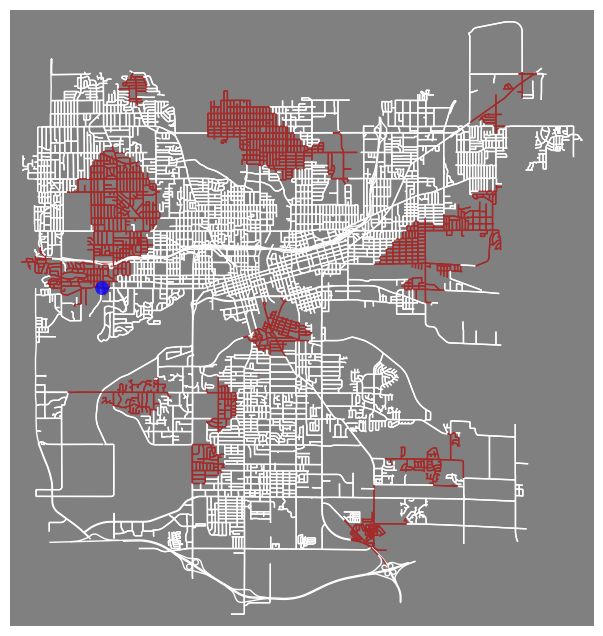

[{'center': 160942958, 'size': 1755},
 {'center': 9678092897, 'size': 954},
 {'center': 160911825, 'size': 1041},
 {'center': 160955006, 'size': 389},
 {'center': 160834040, 'size': 1647},
 {'center': 160929435, 'size': 975},
 {'center': 160976112, 'size': 1258},
 {'center': 160840119, 'size': 193},
 {'center': 160910548, 'size': 622},
 {'center': 160820766, 'size': 186},
 {'center': 160936195, 'size': 1659},
 {'center': 1163836326, 'size': 1300},
 {'center': 160772452, 'size': 1220},
 {'center': 160895527, 'size': 1976},
 {'center': 160911954, 'size': 1340},
 {'center': 4789624236, 'size': 1261},
 {'center': 160995538, 'size': 323},
 {'center': 160971796, 'size': 31},
 {'center': 160934325, 'size': 130},
 {'center': 160790885, 'size': 74},
 {'center': 160842274, 'size': 1802},
 {'center': 160855919, 'size': 1229},
 {'center': 160759140, 'size': 1594},
 {'center': 160914943, 'size': 669},
 {'center': 160908607, 'size': 1211},
 {'center': 160844167, 'size': 1064}]

source location: 160854122
destination location: 160855919


In [ ]:
# as our mapbot has moved to the destination, you may have to reload the map
from mapbots import FullyObservableStreetSweeperWorld

planning_bot = FullyObservableStreetSweeperWorld(place="Des Moines, Iowa, USA",map_number=11)
planning_bot.display_map()
dirty_regions = planning_bot.get_dirty_regions()
display(dirty_regions)
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)

We can display the locations along the route we calculated:

In [ ]:
dirty_regions

[{'center': 160942958, 'size': 1755},
 {'center': 9678092897, 'size': 954},
 {'center': 160911825, 'size': 1041},
 {'center': 160955006, 'size': 389},
 {'center': 160834040, 'size': 1647},
 {'center': 160929435, 'size': 975},
 {'center': 160976112, 'size': 1258},
 {'center': 160840119, 'size': 193},
 {'center': 160910548, 'size': 622},
 {'center': 160820766, 'size': 186},
 {'center': 160936195, 'size': 1659},
 {'center': 1163836326, 'size': 1300},
 {'center': 160772452, 'size': 1220},
 {'center': 160895527, 'size': 1976},
 {'center': 160911954, 'size': 1340},
 {'center': 4789624236, 'size': 1261},
 {'center': 160995538, 'size': 323},
 {'center': 160971796, 'size': 31},
 {'center': 160934325, 'size': 130},
 {'center': 160790885, 'size': 74},
 {'center': 160842274, 'size': 1802},
 {'center': 160855919, 'size': 1229},
 {'center': 160759140, 'size': 1594},
 {'center': 160914943, 'size': 669},
 {'center': 160908607, 'size': 1211},
 {'center': 160844167, 'size': 1064}]

In [ ]:
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)

source location: 160854122
destination location: 160855919


In [ ]:
calculated_route = bfs(planning_bot,dest1)
calculated_route

successfully reached goal state in 3.253293037414551 seconds


deque([160854125,
       160854133,
       160854145,
       160854147,
       160854163,
       160854182,
       160855871,
       160855888,
       160855919])

But remember, this is just a plan - we haven't actually moved yet. Let's do it!

In [ ]:
planning_bot.get_current_location()

{'y': 41.5845488,
 'x': -93.6785831,
 'street_count': 3,
 'location_id': 160854122}

In [ ]:
for loc in calculated_route:
    planning_bot.move_to(loc)

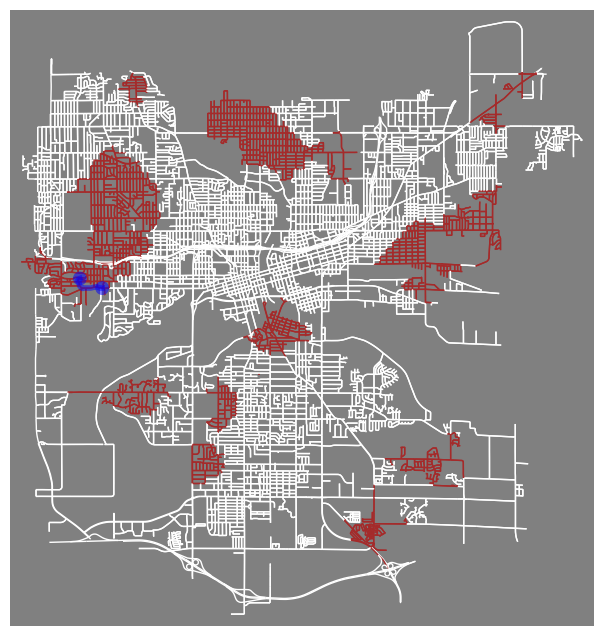

In [ ]:
planning_bot.display_map()

## Exercise#0
Putting everything together, let’s rerun the same experiment. Please run it before attempting the next exercises.

In [ ]:
# Solution with deque() datastructure
# this uses a deque because it has fast access to both the left and right
# since we are implementing the frontier as a queue, it should be much faster

from collections import deque
import time


def bfs(bot,destination):
    # measure time to find efficiency of bfs()
    start_time = time.time()

    # initialize the frontier using the initial state of problem
    initial_location = bot.get_current_location()
    root_node = SSWSearchNode(initial_location["location_id"])
    frontier = deque()
    frontier.append(root_node) # INSERT(initial_state, frontier)


    while True:
        if frontier == []: # if the frontier is empty then return failure
            return None    # failure

        # choose a leaf node from the frontier according to strategy
        chosen_leaf = frontier.popleft() # REMOVE(frontier): take the thing off the front of the "queue"

        # if the node contains a goal state then return the corresponding solution
        if chosen_leaf.location == destination: #destination is the goal

            # calculate the total time spent during bfs() when the goal is reached
            print('successfully reached goal state in', (time.time() - start_time), 'seconds')

            # we're looping through the tree and creating a list from the locations in each node
            route = deque()
            curr_node = chosen_leaf
            while curr_node.parent != None:
                route.appendleft(curr_node.location)
                curr_node = curr_node.parent
            return route
        # else expand the node and add the resulting nodes to the frontier
        else:


            for street in bot.get_outgoing_streets_from_location( chosen_leaf.location ):
                new_node = SSWSearchNode(street["end"]["location_id"], parent=chosen_leaf)

                chosen_leaf.add_child(new_node)
                frontier.append(new_node)


    # calculate the total time spent during bfs() when the goal is reached
    print('Could not reach goal state in', (time.time() - start_time), 'seconds')


In [ ]:
# as our mapbot has moved to the destination, you may have to reload the map
from mapbots import FullyObservableStreetSweeperWorld

planning_bot = FullyObservableStreetSweeperWorld(place="Des Moines, Iowa, USA",map_number=11)
planning_bot.display_map()
dirty_regions = planning_bot.get_dirty_regions()
display(dirty_regions)
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)

In [ ]:
# pick a destination and then apply the search algorithm for a solution
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)
calculated_route = bfs(planning_bot,dest1)
print('Number of states (or location_ids) along the solution provided by bfs():', len(calculated_route))

In [ ]:
# display the path
planning_bot.get_current_location()
for loc in calculated_route:
    planning_bot.move_to(loc)
planning_bot.display_map()

## Exercise#1
Try finding a route to another destination from the `dirty_regions` list. You'll see that it takes a really really really long time. Why do you think that is? Discuss with group.

In [ ]:
# your code
# ...

## Exercise#2

What changes do we need to make to the `bfs` code to make it run faster or more efficient? Try to code that up. You can rename the function to be `bfs_efficient()`.

In [ ]:
# your code
# ...

In [ ]:
# as our mapbot has moved to the destination, you may have to reload the map
from mapbots import FullyObservableStreetSweeperWorld

planning_bot = FullyObservableStreetSweeperWorld(place="Des Moines, Iowa, USA",map_number=11)
planning_bot.display_map()
dirty_regions = planning_bot.get_dirty_regions()
display(dirty_regions)
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)

In [ ]:
# pick a destination and then apply the search algorithm for a solution
dest1 = dirty_regions[-5]['center']
print('source location:', planning_bot.get_current_location()['location_id'])
print('destination location:', dest1)
calculated_route = bfs_efficient(planning_bot,dest1)
print('Number of states (or location_ids) along the solution provided by bfs():', len(calculated_route))

In [ ]:
# display the path
planning_bot.get_current_location()
for loc in calculated_route:
    planning_bot.move_to(loc)
planning_bot.display_map()

## Exercise#3

What changes do we need to make to the `bfs` code to make it work for `dfs`? Write down the idea, and then when everyone in your group is satisfied with them, take a stab at making changes to the code.

Eventually this will be part of the next project.

In [ ]:
# your code
# ...

## Thoughts for the future

What changes do we need to make to the `dfs` code to make it work for `iterative deepening search()` or `ids`?

Recall from our class discussion that `ids` is a search strategy that uses a limited version of `dfs()` called `depth-limited search()`. This means that during this modified version of `dfs()`, we can safely assume that nodes at the *l*-th depth level have no successors.

Write down the idea, and then when everyone in your group is satisfied with them, take a stab at making changes to the code.

Eventually this will be part of the next project.

###write down your idea, you don't have to write your code

<!--## Exercise#3

Since we have a problem with costs associated with each action (e.g., Travel Time), we should try Uniform Cost Search. What changes do we need to make to the `bfs` code to make it work for Uniform Cost Search? Write down some ideas, and then when everyone in your group is satisfied with them, take a stab at making changes to the code.


Eventually this will be part of the next project.
-->